# Análise do Sensor CE

In [76]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

In [29]:
# Caminhos para os arquivos
data_folder = "Dados"

# Listar arquivos de dados brutos de sensores
sensor_files = [f for f in os.listdir(data_folder) if f.endswith('.txt')]

print("\nArquivos de dados brutos de sensores:")
print(sensor_files)


Arquivos de dados brutos de sensores:
['CE.txt', 'CP.txt', 'EPS1.txt', 'FS1.txt', 'FS2.txt', 'PS1.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt', 'SE.txt', 'TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt', 'VS1.txt']


In [30]:
# Criar um dicionário para armazenar os DataFrames
df = pd.read_csv(f"{data_folder}//{sensor_files[0]}", delimiter='\t', header=None)  # Ler os arquivos tabulados
df.shape

(2205, 60)

In [31]:
# Adicionar a coluna de ciclo
df["Ciclo"] = df.index + 1

# Transformar os dados de wide para long format
df_long = df.melt(id_vars=["Ciclo"], var_name="Tempo", value_name="Eficiência")

# Converter tempo para valores numéricos (representando a ordem das medições)
df_long["Tempo"] = df_long["Tempo"].astype(int)

# Estatísticas descritivas
print(df_long.describe())
df_long.head()
df_long.tail()

               Ciclo          Tempo     Eficiência
count  132300.000000  132300.000000  132300.000000
mean     1103.000000      29.500000      31.299077
std       636.531012      17.318168      11.577950
min         1.000000       0.000000      17.042000
25%       552.000000      14.750000      20.131750
50%      1103.000000      29.500000      27.303000
75%      1654.000000      44.250000      46.625000
max      2205.000000      59.000000      48.777000


,Ciclo,Tempo,Eficiência
132295,2201,59,46.382
132296,2202,59,46.729
132297,2203,59,46.502
132298,2204,59,46.570
132299,2205,59,46.621


In [32]:
# Selecionar uma amostra de 100 ciclos aleatórios
sample_cycles = df_long["Ciclo"].sample(n=100, random_state=42)
df_sample = df_long[df_long["Ciclo"].isin(sample_cycles)]
print(df_sample.describe())

             Ciclo       Tempo   Eficiência
count  5940.000000  5940.00000  5940.000000
mean   1121.505051    29.50000    30.723829
std     615.307846    17.31956    11.246497
min      37.000000     0.00000    18.099000
25%     628.000000    14.75000    20.283750
50%    1097.000000    29.50000    27.219500
75%    1641.000000    44.25000    46.664000
max    2184.000000    59.00000    48.277000


## Histograma: Distribuição dos Valores de Eficiência

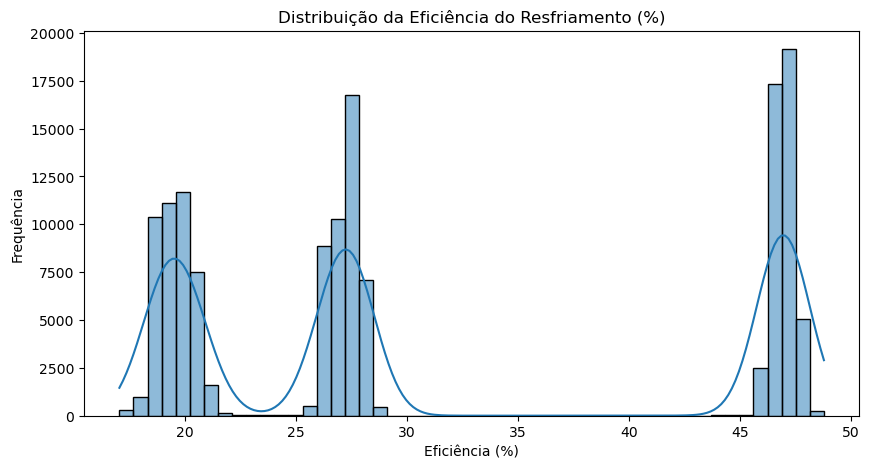

In [33]:
# Criar gráfico de distribuição
plt.figure(figsize=(10, 5))
sns.histplot(df_long["Eficiência"], bins=50, kde=True)
plt.title("Distribuição da Eficiência do Resfriamento (%)")
plt.xlabel("Eficiência (%)")
plt.ylabel("Frequência")
plt.show()

### Picos na faixa de 20%:
- Frequência concentrada entre 10.000 e 12.500 com um desvio padrão em torno de 3%.
- Isso sugere que, para uma parte significativa dos ciclos, o sensor registra uma eficiência relativamente baixa e consistente.
### Faixa de 26-28%:
- Frequência entre 7.500 e 10.000, mas com uma coluna (um ponto específico) apresentando um pico bem mais alto (cerca de 17.500).
- Esse pico pode indicar um comportamento anômalo ou uma característica marcante de algum subgrupo de ciclos.
### Faixa de 46-48%:
- Picos alternantes com bordas (2500–5000 de frequência) e centros com frequências mais altas (acima de 17.500).
- Isso pode refletir uma variação mais dinâmica quando o sistema opera em um estado de alta eficiência.


## Gráfico de Tendência: Variação da Eficiência do Resfriamento ao longo do Tempo

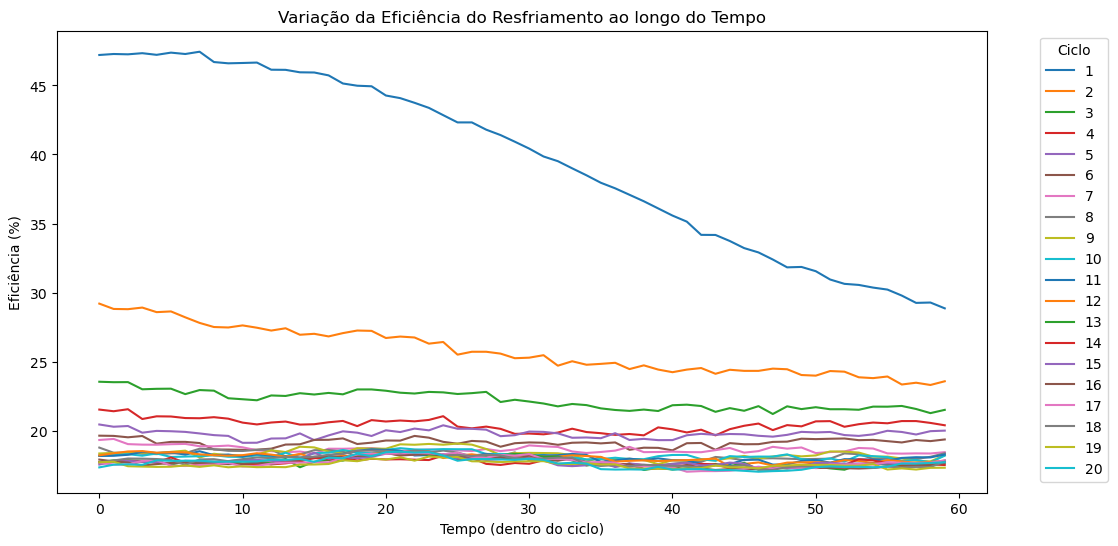

In [34]:
# Criar gráfico de tendência ao longo do tempo para alguns ciclos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long[df_long["Ciclo"] <= 20], x="Tempo", y="Eficiência", hue="Ciclo", palette="tab10")
plt.title("Variação da Eficiência do Resfriamento ao longo do Tempo")
plt.xlabel("Tempo (dentro do ciclo)")
plt.ylabel("Eficiência (%)")
plt.legend(title="Ciclo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Gráfico de Dispersão: Evolução da Eficiência ao Longo dos Ciclos

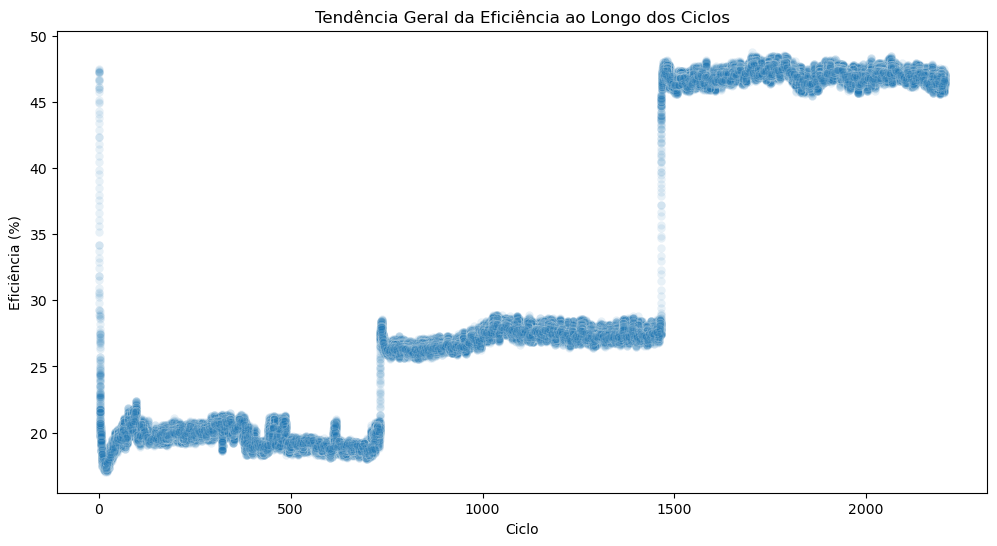

In [35]:
# Criar um gráfico de dispersão para mostrar a tendência geral
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_long, x="Ciclo", y="Eficiência", alpha=0.1)  # Reduzir opacidade para melhor visualização
plt.title("Tendência Geral da Eficiência ao Longo dos Ciclos")
plt.xlabel("Ciclo")
plt.ylabel("Eficiência (%)")
plt.show()

### Ciclos iniciais (até ~100):
- Alta variabilidade, com eficiência variando de cerca de 47% até 7%.
- Possivelmente, o sistema está se estabilizando ou calibrando suas medições.
### Ciclos 100 a 400:
- A eficiência se estabiliza em torno de 20%.
- Esse período pode representar um regime operacional “normal” ou uma condição de funcionamento estável.
### Ciclos 400 a 700:
- Uma queda na eficiência para cerca de 15%, sugerindo uma possível degradação ou mudança no comportamento do sistema.
### Ciclos 700 a 800:
- Um aumento abrupto para cerca de 27%, que se mantém até aproximadamente o ciclo 1500.
- Essa mudança pode indicar uma intervenção, uma mudança de regime ou um período de recuperação/ajuste.
### Ciclo 1500 em diante:
- Um novo aumento abrupto para cerca de 47%, com oscilações posteriores.
- Esse salto pode sinalizar uma mudança significativa na operação do sistema ou na qualidade do resfriamento.


## Boxplot: Variação da Eficiência do Resfriamento por Ciclo

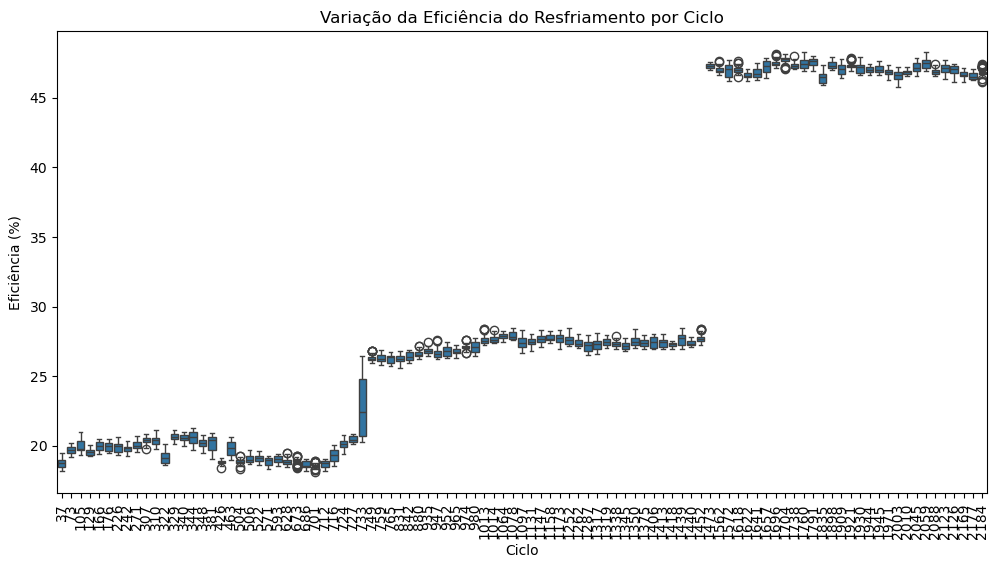

In [36]:
# Criar Boxplot para identificar variações e outliers por ciclo
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sample, x="Ciclo", y="Eficiência")
plt.xticks(rotation=90)
plt.title("Variação da Eficiência do Resfriamento por Ciclo")
plt.xlabel("Ciclo")
plt.ylabel("Eficiência (%)")
plt.show()

O padrão observado é consistente com o gráfico de dispersão, reforçando que há mudanças claras na distribuição dos valores de eficiência ao longo dos ciclos.


## Passo 1: Extrair Estatísticas do Sensor CE por Ciclo

In [38]:
# Agrupar os dados do sensor CE por ciclo e calcular estatísticas
aggregated_sensor = df_long.groupby("Ciclo")["Eficiência"].agg(
    media="mean",
    desvio="std",
    minimo="min",
    maximo="max",
    mediana="median"
).reset_index()

# Visualizar as primeiras linhas do resultado
aggregated_sensor.head()

,Ciclo,media,desvio,minimo,maximo,mediana
0,1,39.601350,6.370535,28.866,47.438,40.6755
1,2,25.786433,1.686129,23.320,29.208,25.3855
2,3,22.218233,0.638345,21.220,23.554,22.1040
3,4,20.459817,0.455755,19.673,21.565,20.4805
4,5,19.787017,0.290156,19.133,20.460,19.7985


## Passo 2: Unir os Dados com o profile.txt

In [64]:
# Ler o arquivo profile.txt (ajuste o caminho conforme necessário)
profile_df = pd.read_csv("profile.txt", delimiter="\t", header=None, 
                         names=["Cooler_condition", "Valve_condition", "Pump_leakage", "Accumulator_pressure", "Stable_flag"])

# Adicionar coluna 'Ciclo' (assumindo que o primeiro ciclo é 1)
profile_df["Ciclo"] = profile_df.index + 1

# Unir os dados do sensor (aggregated_sensor) com o profile usando o campo 'Ciclo'
merged_df = pd.merge(aggregated_sensor, profile_df, on="Ciclo", how="inner")

# Visualizar as primeiras linhas do DataFrame unificado
merged_df.head()

,Ciclo,media,desvio,minimo,maximo,mediana,Cooler_condition,Valve_condition,Pump_leakage,Accumulator_pressure,Stable_flag
0,1,39.601350,6.370535,28.866,47.438,40.6755,3,100,0,130,1
1,2,25.786433,1.686129,23.320,29.208,25.3855,3,100,0,130,1
2,3,22.218233,0.638345,21.220,23.554,22.1040,3,100,0,130,1
3,4,20.459817,0.455755,19.673,21.565,20.4805,3,100,0,130,1
4,5,19.787017,0.290156,19.133,20.460,19.7985,3,100,0,130,1


## Passo 3: Visualizar e Analisar a Relação Entre os Sensores e as Condições do Sistema

### Condição do Cooler

#### Boxplot: Média da Eficiência por Condição do Cooler

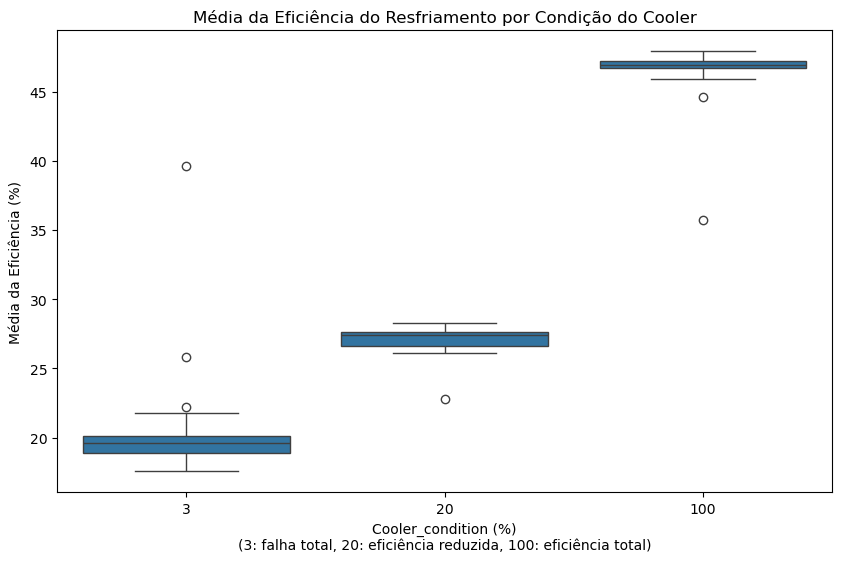

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cooler_condition", y="media", data=merged_df)
plt.title("Média da Eficiência do Resfriamento por Condição do Cooler")
plt.xlabel("Cooler_condition (%)\n(3: falha total, 20: eficiência reduzida, 100: eficiência total)")
plt.ylabel("Média da Eficiência (%)")
plt.show()

#### Scatterplot: Média da Eficiência vs. Condição do Cooler

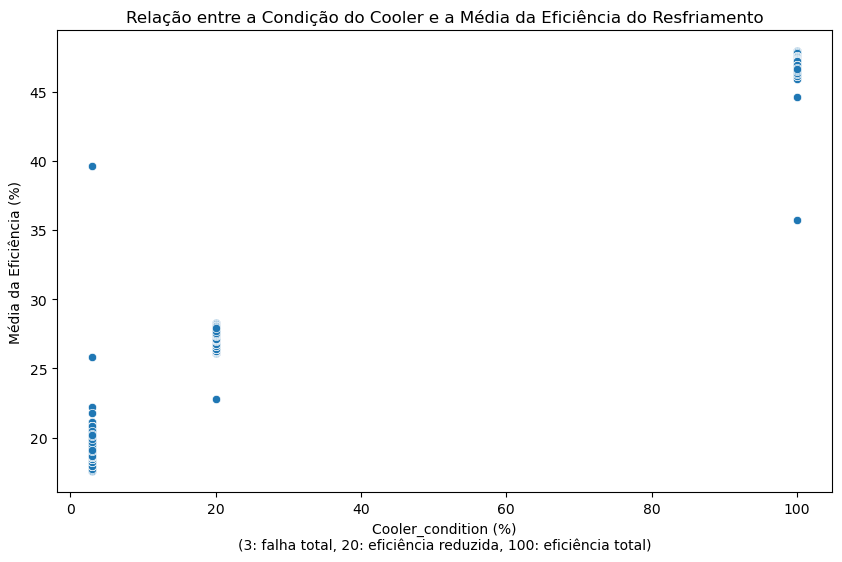

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Cooler_condition", y="media", data=merged_df)
plt.title("Relação entre a Condição do Cooler e a Média da Eficiência do Resfriamento")
plt.xlabel("Cooler_condition (%)\n(3: falha total, 20: eficiência reduzida, 100: eficiência total)")
plt.ylabel("Média da Eficiência (%)")
plt.show()

#### ANOVA

In [78]:
# Verificar os grupos de média da eficiência por Cooler_condition
print("Contagem por Cooler_condition:")
print(merged_df["Cooler_condition"].value_counts())

# Preparar os grupos para ANOVA:
# Agrupamos os valores de 'media' do sensor CE para cada categoria do Cooler_condition.
groups = [group["media"].values for name, group in merged_df.groupby("Cooler_condition")]

# Realizar o teste ANOVA
F_stat, p_value = stats.f_oneway(*groups)
print(f"\nResultado do ANOVA para 'media' vs Cooler_condition:\nF-statistic = {F_stat:.3f}, p-value = {p_value:.3e}")

Contagem por Cooler_condition:
Cooler_condition
100    741
3      732
20     732
Name: count, dtype: int64

Resultado do ANOVA para 'media' vs Cooler_condition:
F-statistic = 248715.784, p-value = 0.000e+00


#### Teste de Correlação

In [81]:
# Calcular a correlação de Pearson entre a média da eficiência e a Condição do Cooler
correlation = merged_df[["media", "Cooler_condition"]].corr()
print("\nMatriz de Correlação entre 'media' e 'Cooler_condition':")
print(correlation)


Matriz de Correlação entre 'media' e 'Cooler_condition':
                     media  Cooler_condition
media             1.000000          0.991943
Cooler_condition  0.991943          1.000000


### Condição da Válvula

#### Boxplot: Média da Eficiência por Condição da Válvula

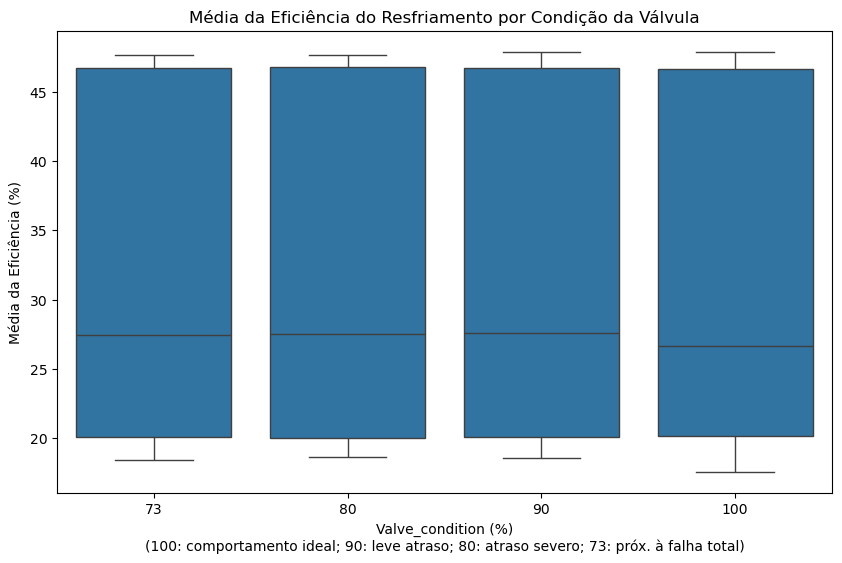

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Valve_condition", y="media", data=merged_df)
plt.title("Média da Eficiência do Resfriamento por Condição da Válvula")
plt.xlabel("Valve_condition (%)\n(100: comportamento ideal; 90: leve atraso; 80: atraso severo; 73: próx. à falha total)")
plt.ylabel("Média da Eficiência (%)")
plt.show()

#### Scatterplot: Média da Eficiência vs. Condição da Válvula

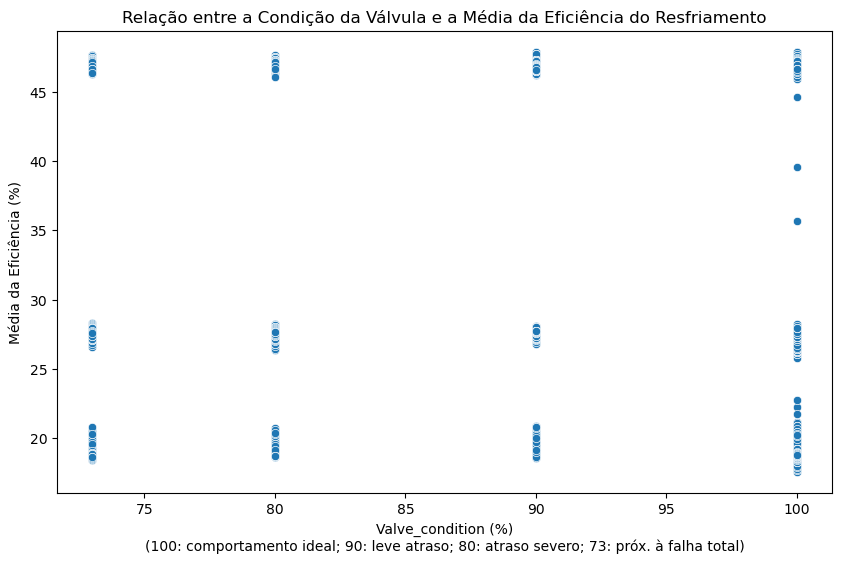

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Valve_condition", y="media", data=merged_df)
plt.title("Relação entre a Condição da Válvula e a Média da Eficiência do Resfriamento")
plt.xlabel("Valve_condition (%)\n(100: comportamento ideal; 90: leve atraso; 80: atraso severo; 73: próx. à falha total)")
plt.ylabel("Média da Eficiência (%)")
plt.show()

#### ANOVA

In [83]:
# Verificar os grupos de média da eficiência por Valve_condition
print("Contagem por Valve_condition:")
print(merged_df["Valve_condition"].value_counts())

# Preparar os grupos para ANOVA:
# Agrupamos os valores de 'media' do sensor CE para cada categoria do Valve_condition.
groups = [group["media"].values for name, group in merged_df.groupby("Valve_condition")]

# Realizar o teste ANOVA
F_stat, p_value = stats.f_oneway(*groups)
print(f"\nResultado do ANOVA para 'media' vs Valve_condition:\nF-statistic = {F_stat:.3f}, p-value = {p_value:.3e}")

Contagem por Valve_condition:
Valve_condition
100    1125
73      360
80      360
90      360
Name: count, dtype: int64

Resultado do ANOVA para 'media' vs Valve_condition:
F-statistic = 0.005, p-value = 9.995e-01


#### Teste de Correlação

In [82]:
# Calcular a correlação de Pearson entre a média da eficiência e a Condição da Válvula
correlation = merged_df[["media", "Valve_condition"]].corr()
print("\nMatriz de Correlação entre 'media' e 'Valve_condition':")
print(correlation)


Matriz de Correlação entre 'media' e 'Valve_condition':
                    media  Valve_condition
media            1.000000        -0.001463
Valve_condition -0.001463         1.000000


### Vazamento Interno da Bomba

#### Boxplot: Média da Eficiência por Vazamento Interno da Bomba

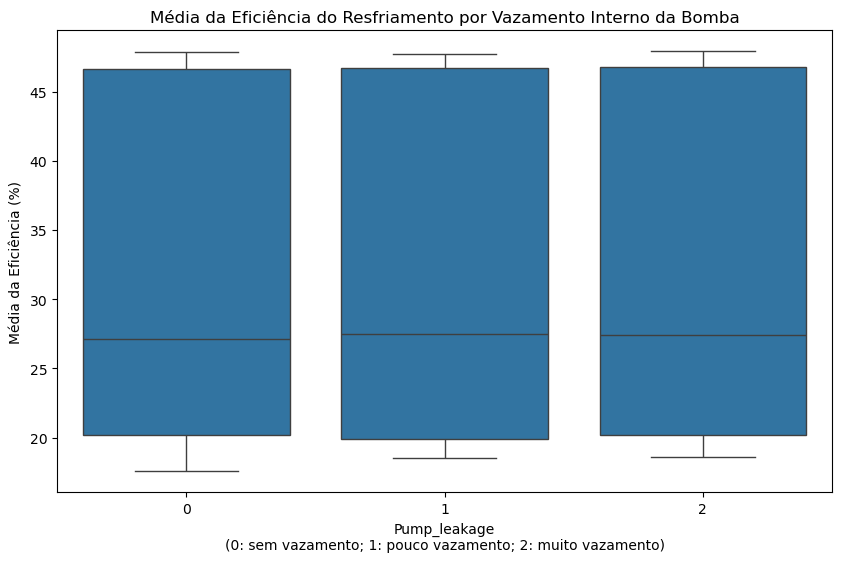

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Pump_leakage", y="media", data=merged_df)
plt.title("Média da Eficiência do Resfriamento por Vazamento Interno da Bomba")
plt.xlabel("Pump_leakage\n(0: sem vazamento; 1: pouco vazamento; 2: muito vazamento)")
plt.ylabel("Média da Eficiência (%)")
plt.show()

#### Scatterplot: Média da Eficiência vs. Vazamento Interno da Bomba

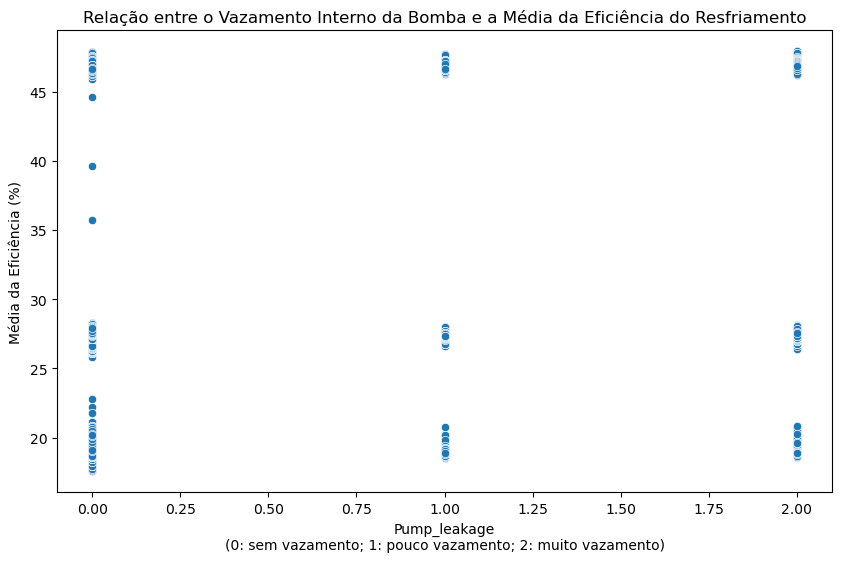

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Pump_leakage", y="media", data=merged_df)
plt.title("Relação entre o Vazamento Interno da Bomba e a Média da Eficiência do Resfriamento")
plt.xlabel("Pump_leakage\n(0: sem vazamento; 1: pouco vazamento; 2: muito vazamento)")
plt.ylabel("Média da Eficiência (%)")
plt.show()

#### ANOVA

In [84]:
# Verificar os grupos de média da eficiência por Pump_leakage
print("Contagem por Pump_leakage:")
print(merged_df["Pump_leakage"].value_counts())

# Preparar os grupos para ANOVA:
# Agrupamos os valores de 'media' do sensor CE para cada categoria do Pump_leakage.
groups = [group["media"].values for name, group in merged_df.groupby("Pump_leakage")]

# Realizar o teste ANOVA
F_stat, p_value = stats.f_oneway(*groups)
print(f"\nResultado do ANOVA para 'media' vs Valve_condition:\nF-statistic = {F_stat:.3f}, p-value = {p_value:.3e}")

Contagem por Pump_leakage:
Pump_leakage
0    1221
2     492
1     492
Name: count, dtype: int64

Resultado do ANOVA para 'media' vs Valve_condition:
F-statistic = 0.015, p-value = 9.853e-01


#### Teste de Correlação

In [85]:
# Calcular a correlação de Pearson entre a média da eficiência e o Vazamento Interno da Bomba
correlation = merged_df[["media", "Pump_leakage"]].corr()
print("\nMatriz de Correlação entre 'media' e 'Pump_leakage':")
print(correlation)


Matriz de Correlação entre 'media' e 'Pump_leakage':
                 media  Pump_leakage
media         1.000000     -0.000381
Pump_leakage -0.000381      1.000000


### Pressão do Acumulador

#### Boxplot: Média da Eficiência por Condição do Cooler

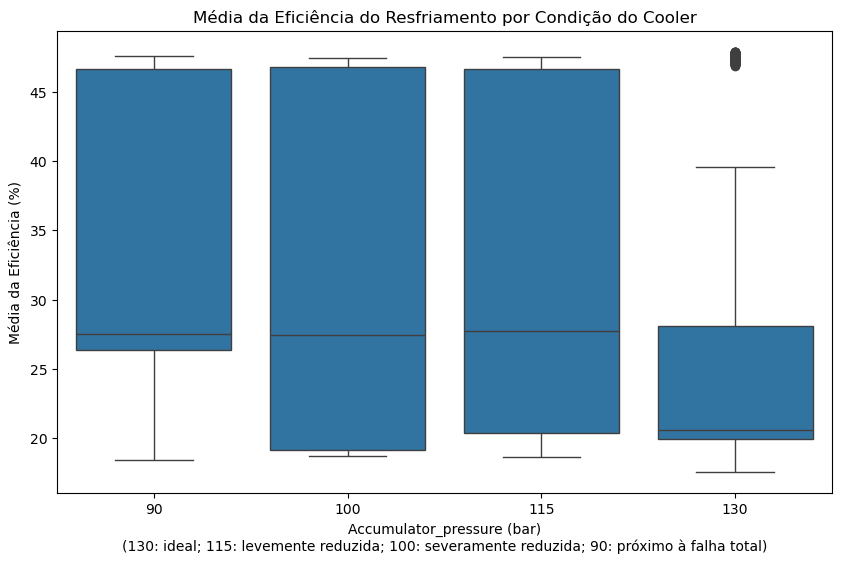

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Accumulator_pressure", y="media", data=merged_df)
plt.title("Média da Eficiência do Resfriamento por Condição do Cooler")
plt.xlabel("Accumulator_pressure (bar)\n(130: ideal; 115: levemente reduzida; 100: severamente reduzida; 90: próximo à falha total)")
plt.ylabel("Média da Eficiência (%)")
plt.show()

#### Scatterplot: Média da Eficiência vs. Pressão do Acumulador

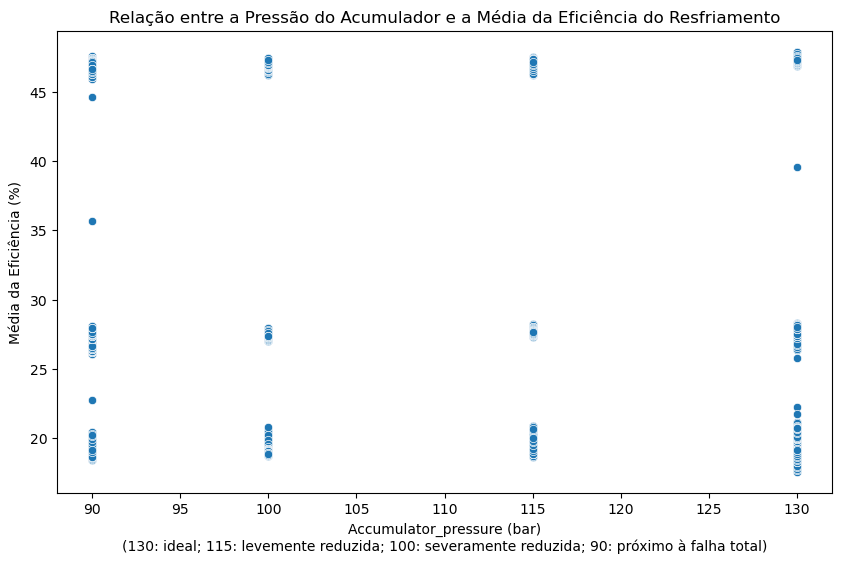

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Accumulator_pressure", y="media", data=merged_df)
plt.title("Relação entre a Pressão do Acumulador e a Média da Eficiência do Resfriamento")
plt.xlabel("Accumulator_pressure (bar)\n(130: ideal; 115: levemente reduzida; 100: severamente reduzida; 90: próximo à falha total)")
plt.ylabel("Média da Eficiência (%)")
plt.show()

### Stable Flag

#### Boxplot: Média da Eficiência por Stable Flag

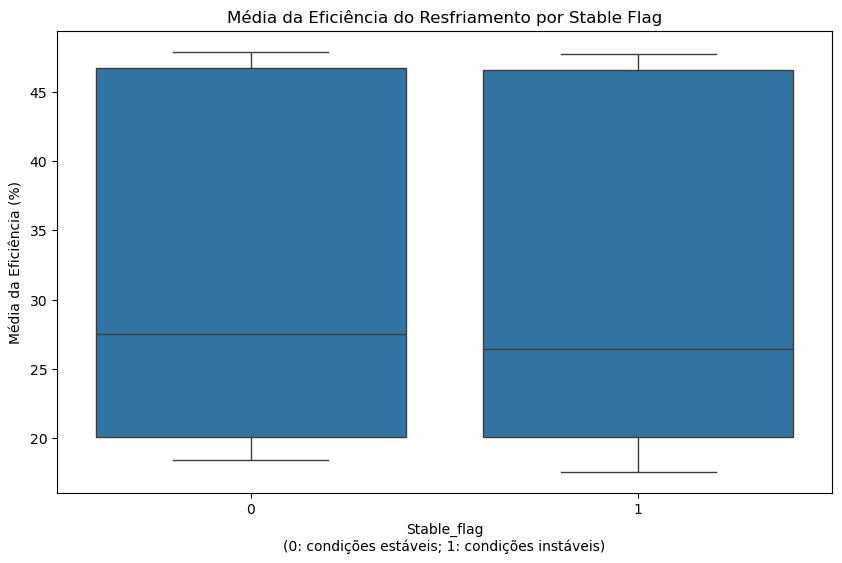

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Stable_flag", y="media", data=merged_df)
plt.title("Média da Eficiência do Resfriamento por Stable Flag")
plt.xlabel("Stable_flag\n(0: condições estáveis; 1: condições instáveis)")
plt.ylabel("Média da Eficiência (%)")
plt.show()

#### Scatterplot: Média da Eficiência vs. Stable Flag

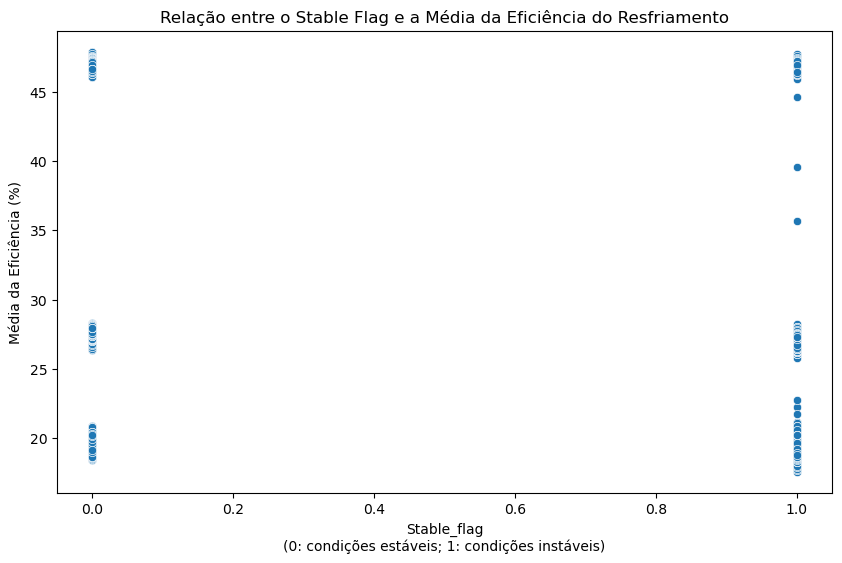

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Stable_flag", y="media", data=merged_df)
plt.title("Relação entre o Stable Flag e a Média da Eficiência do Resfriamento")
plt.xlabel("Stable_flag\n(0: condições estáveis; 1: condições instáveis)")
plt.ylabel("Média da Eficiência (%)")
plt.show()